# クラスタリング（k平均法）

In [1]:
import pandas as pd

## データの確認

### データの読み込み

In [2]:
df = pd.read_csv(r'sample_data\temperature.csv')
df

,地域,気温,降水量
0,北海道,9.5,1282
1,青森県,11.0,1553
2,岩手県,11.0,1322
3,宮城県,13.6,1082
4,秋田県,12.3,2017
5,山形県,12.6,1124
6,福島県,14.2,828
7,茨城県,15.3,1283
8,栃木県,15.2,1257
9,群馬県,16.1,1047


## モデルの作成

### クラスタリングモデルの作成

In [13]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=2, random_state=0)
km.fit(df.drop('地域', axis=1))

KMeans(n_clusters=2, random_state=0)

## 予測の実行

### グループを2つに分ける

In [14]:
gl = km.labels_
print(gl)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 1 1]


### 結合用のデータフレームをつくる

In [15]:
df['グループ'] = gl
df.sort_values('グループ')

,地域,気温,降水量,グループ
0,北海道,9.5,1282,0
25,京都府,16.9,1770,0
26,大阪府,17.4,1652,0
27,兵庫県,17.4,2038,0
28,奈良県,16.2,1647,0
29,和歌山県,17.3,1951,0
31,島根県,15.6,1977,0
32,岡山県,16.3,1410,0
33,広島県,16.8,1879,0
34,山口県,16.0,1940,0


### データのグラフ化

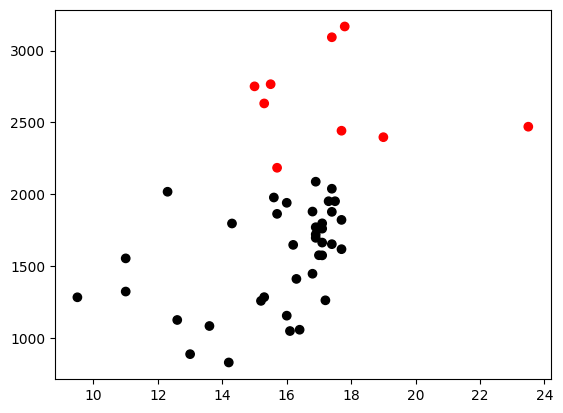

In [16]:
import matplotlib.pyplot as plt
x = df['気温']
y = df['降水量']
df['グループの色'] = df['グループ'].map({0: 'k', 1: 'r'})
plt.scatter(x, y, c=df['グループの色'])

### グラフに日本語を表示する

In [17]:
import japanize_matplotlib
plt.rcParams["font.family"] = "IPAexGothic"

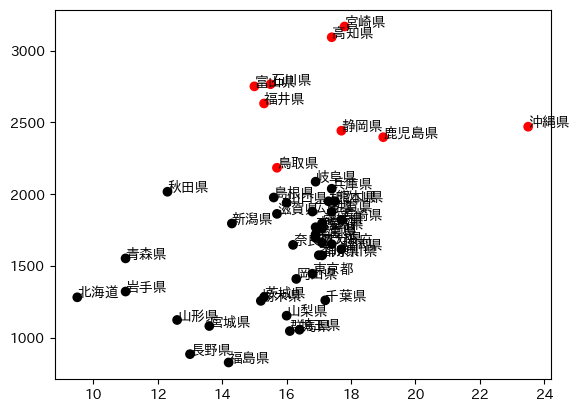

In [18]:
text = df['地域']
x = df['気温']
y = df['降水量']
df['グループの色'] = df['グループ'].map({0: 'k', 1: 'r'})
plt.scatter(x, y, c=df['グループの色'])
texts = [plt.text(x[i], y[i], text[i]) for i in range(len(x))]